# Import Library

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# Train Test Split
from sklearn.model_selection import train_test_split

# Menyatukan beberapa tahap Preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encoder dan Scaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_iterative_imputer

# Algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Cross Validation untuk menentukan Algoritma Terbaik
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, StratifiedKFold

# Metrics untuk Regresi
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer, fbeta_score, recall_score, precision_score, average_precision_score, precision_recall_curve, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Imputer dan Pipeline
from sklearn.impute import IterativeImputer, SimpleImputer
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Label Mapping

In [3]:
label_mapping = {'Y':1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(label_mapping)

# Dependents Mapping

In [4]:
dependents_mapping = {'0':0,'1':1,'2':2, '3+':3}
df['Dependents'] = df['Dependents'].map(dependents_mapping)

# Drop Column Loan_ID

In [5]:
df = df.drop(columns='Loan_ID',axis=1)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [7]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

# Check Duplicate

In [8]:
df.duplicated().sum()

0

# Check Null Value

In [9]:
df[df.columns].isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Check Imbalance on Target/Label

In [10]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [13]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in Gender:  2
Unique values:  ['Male' 'Female' nan]

Total unique values in Married:  2
Unique values:  ['No' 'Yes' nan]

Total unique values in Education:  2
Unique values:  ['Graduate' 'Not Graduate']

Total unique values in Self_Employed:  2
Unique values:  ['No' 'Yes' nan]

Total unique values in Property_Area:  3
Unique values:  ['Urban' 'Rural' 'Semiurban']



# EDA

In [14]:
count = 0
fig = plt.figure(figsize=(20,20), dpi=500)

for i in df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Loan_Status']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Loan_Status'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

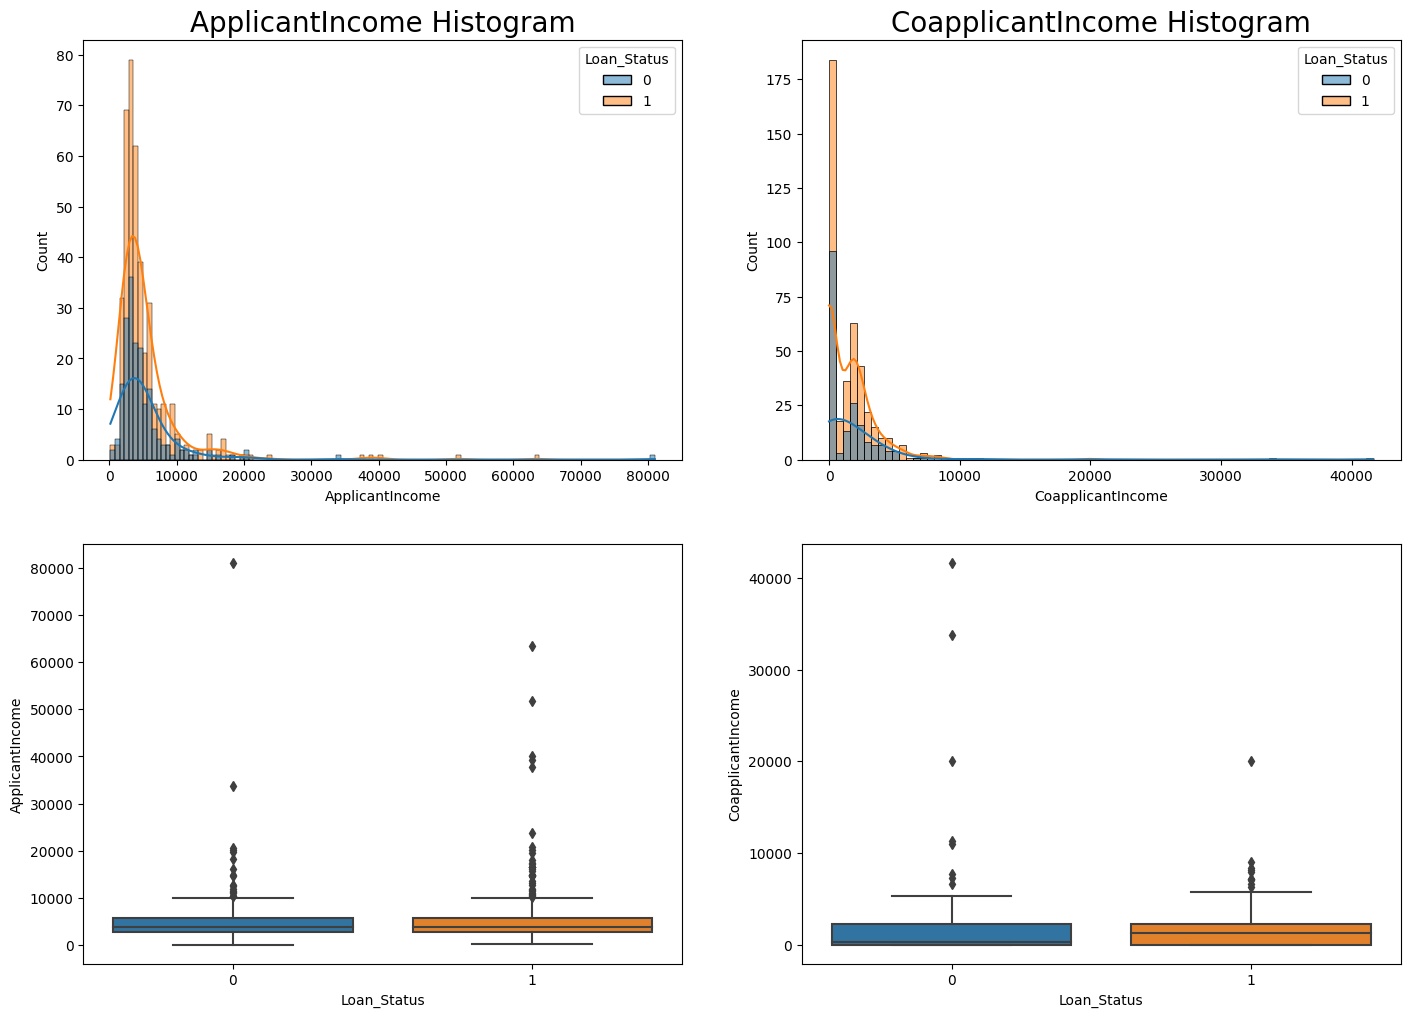

In [15]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='ApplicantIncome',hue='Loan_Status',kde=True)
plt.title('ApplicantIncome Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='CoapplicantIncome',hue='Loan_Status',kde=True)
plt.title('CoapplicantIncome Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='ApplicantIncome', x='Loan_Status')

plt.subplot(224)
sns.boxplot(data=df,y='CoapplicantIncome', x='Loan_Status')
plt.show()

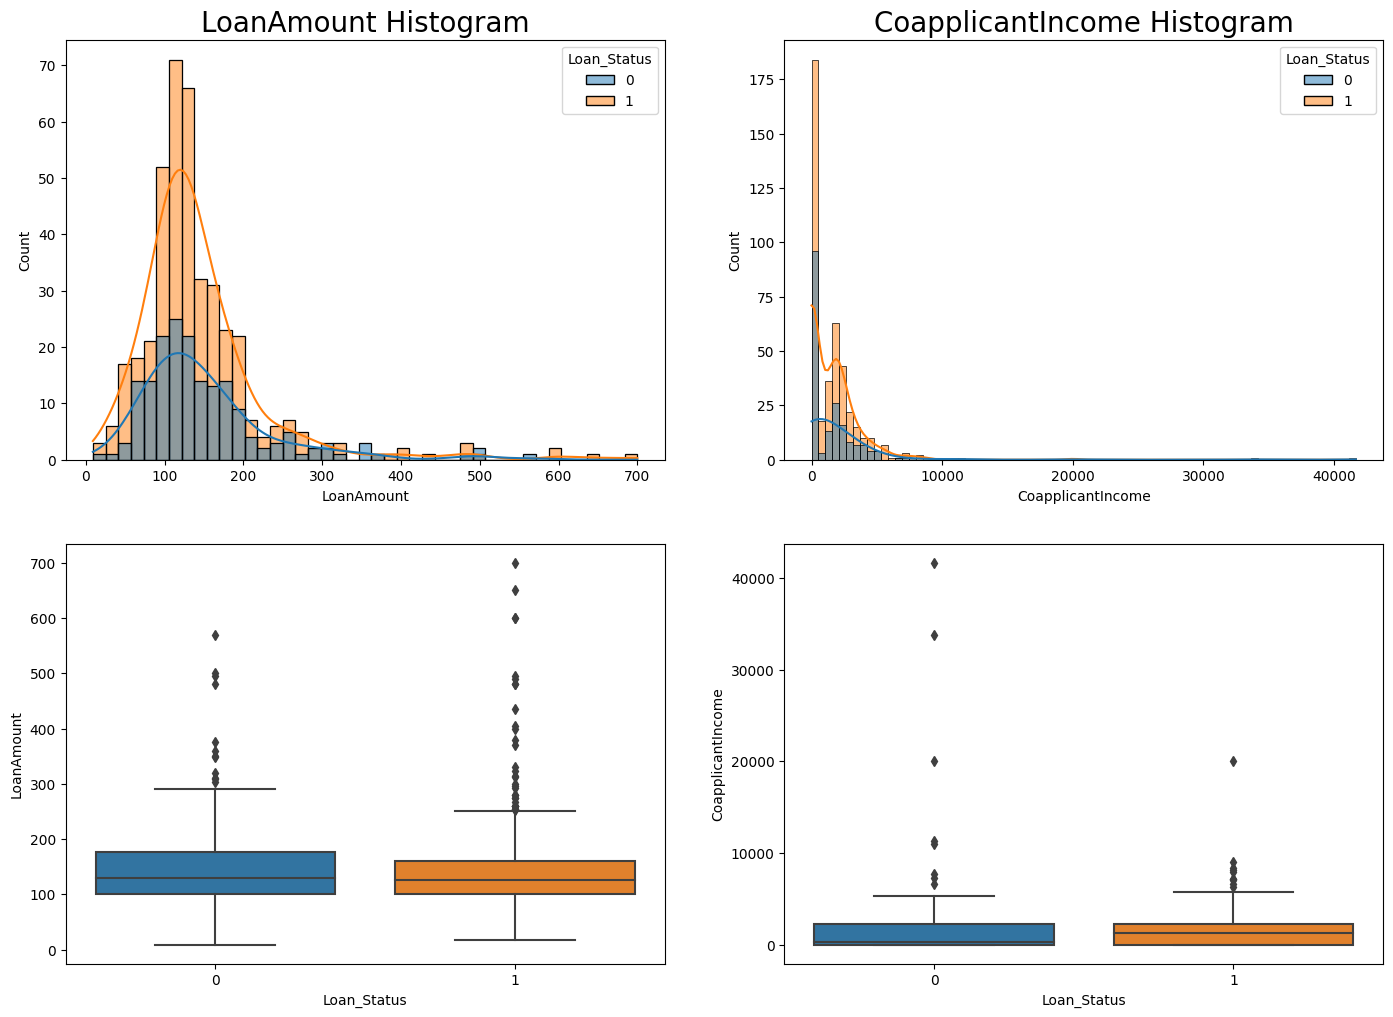

In [16]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='LoanAmount',hue='Loan_Status',kde=True)
plt.title('LoanAmount Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='CoapplicantIncome',hue='Loan_Status',kde=True)
plt.title('CoapplicantIncome Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='LoanAmount', x='Loan_Status')

plt.subplot(224)
sns.boxplot(data=df,y='CoapplicantIncome', x='Loan_Status')
plt.show()

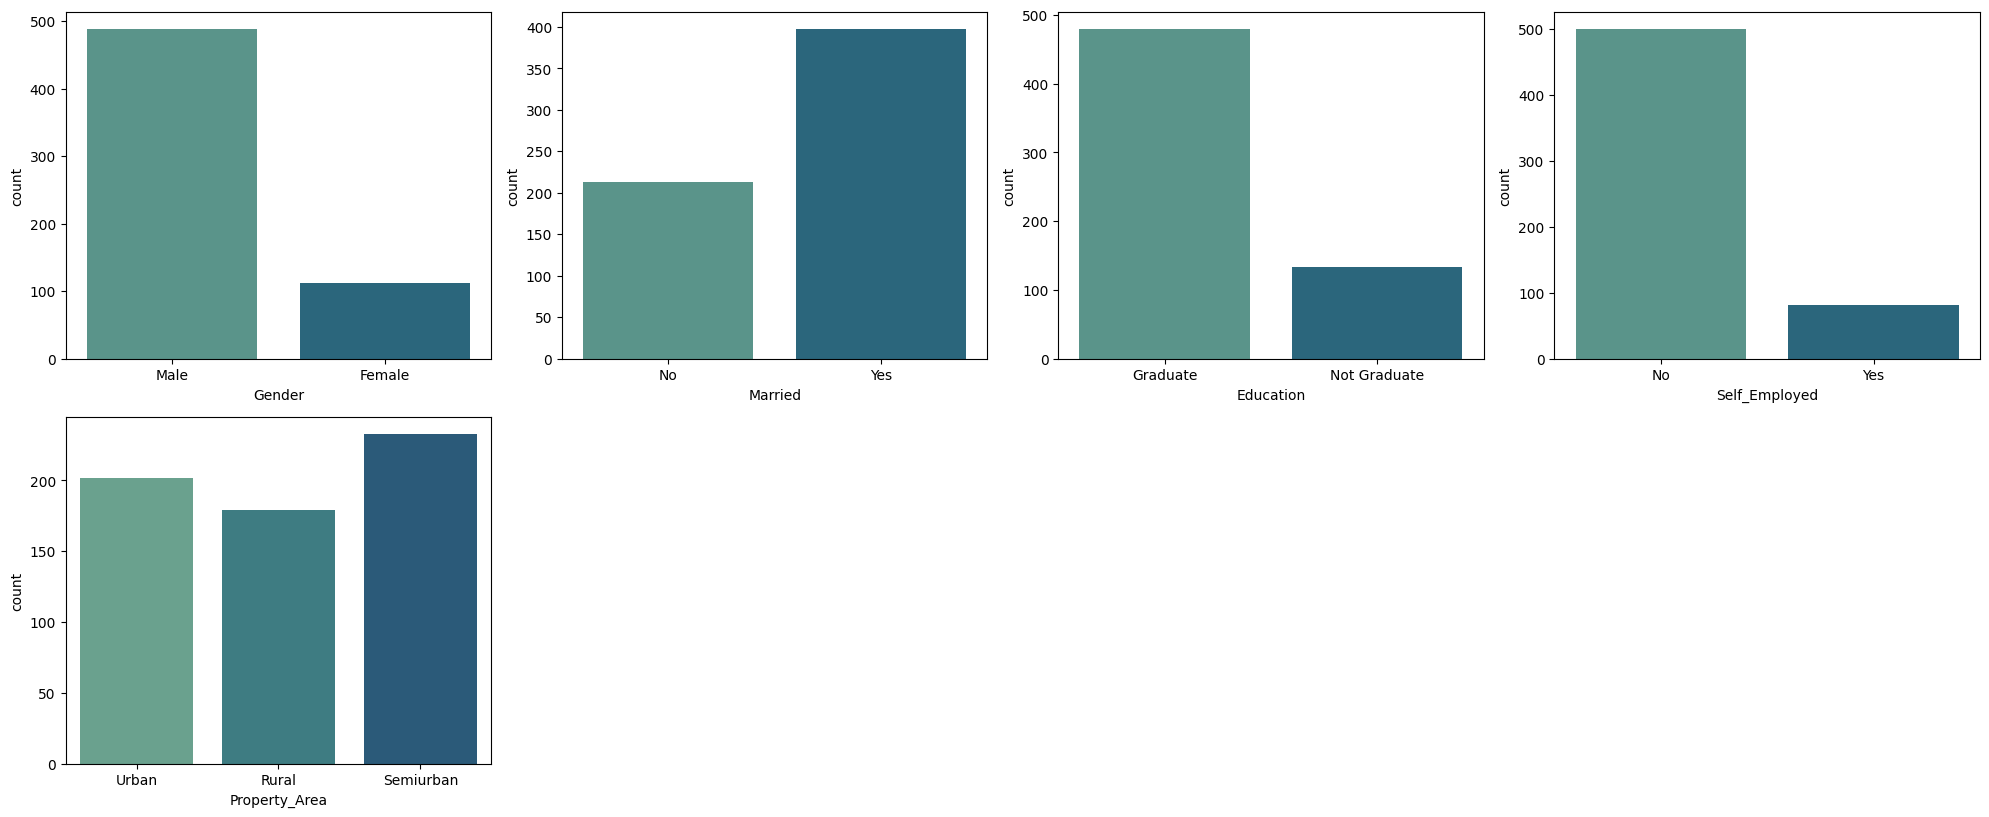

In [17]:
cat_cols = ['Gender','Married','Education','Self_Employed', 'Property_Area']

plt.figure(figsize=(20, 20))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest') 

plt.tight_layout()
plt.show()

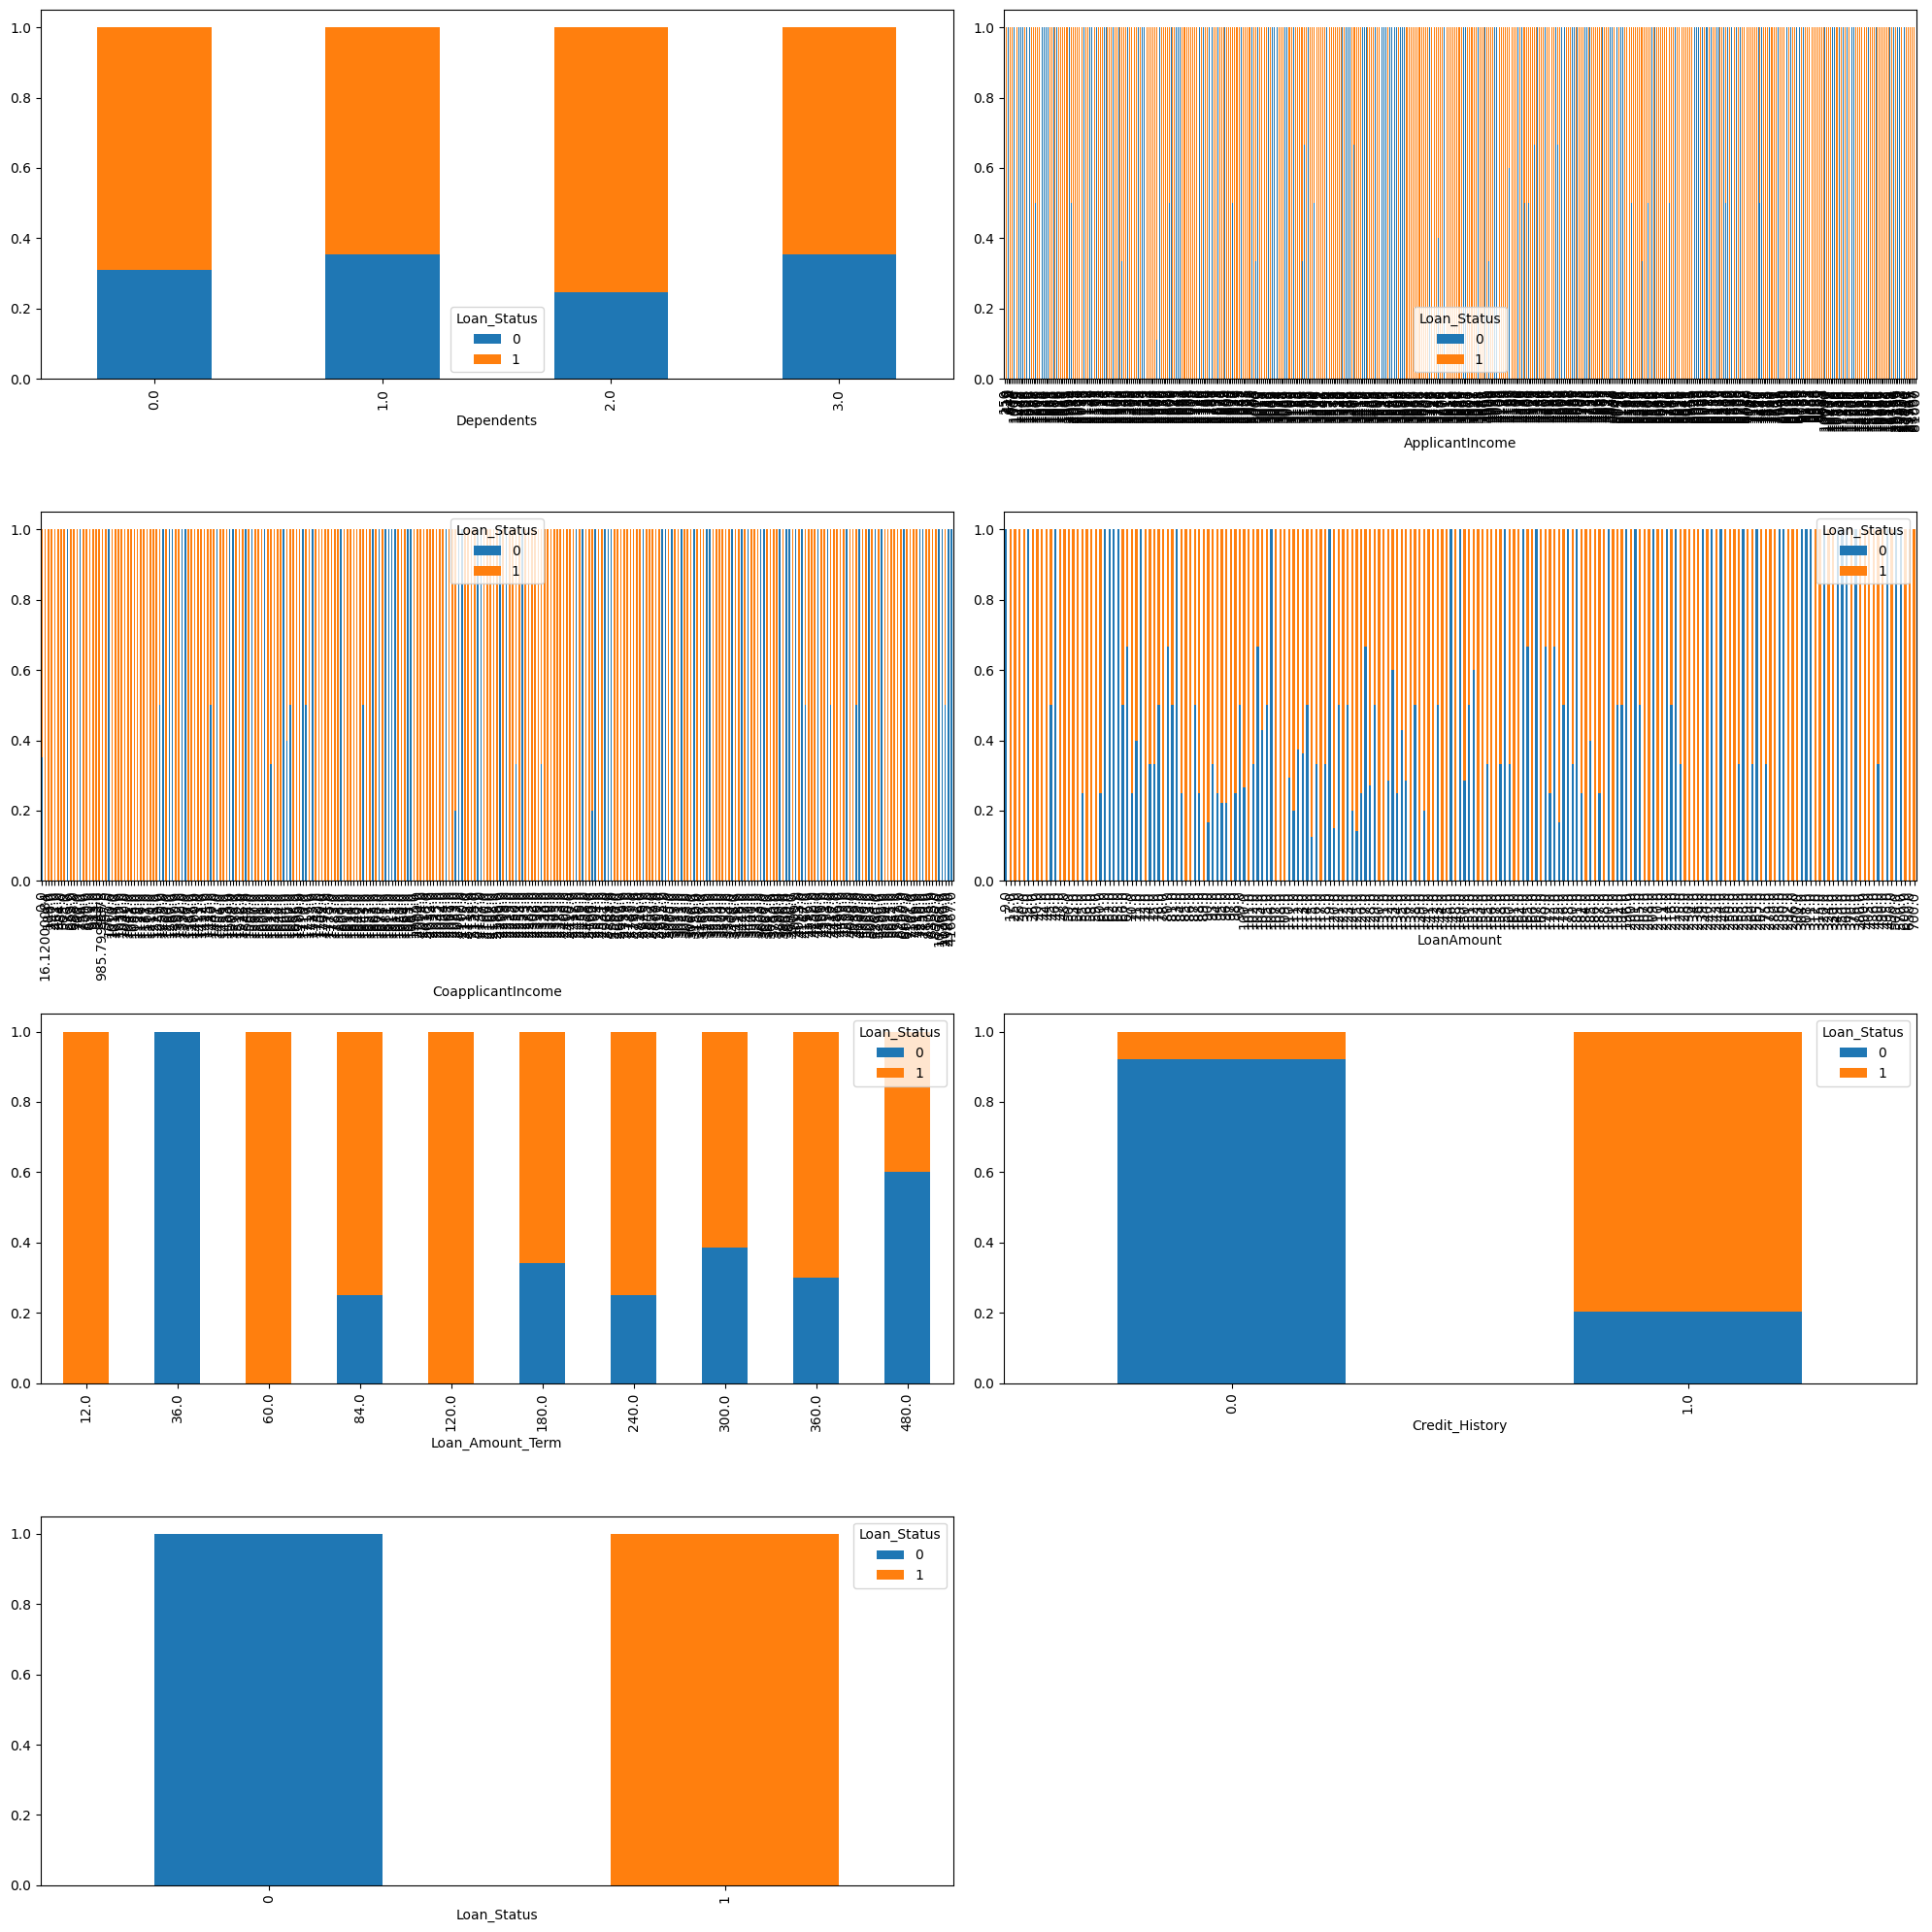

In [18]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Gender','Married','Education','Self_Employed', 'Property_Area']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Loan_Status'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

# Define X and y

In [19]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [20]:
df['Dependents'].value_counts()

Dependents
0.0    345
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64

# Data Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


In [23]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


# Pipeline & Transformer

In [25]:
from category_encoders import BinaryEncoder, OrdinalEncoder

In [26]:
# Categorical
pipe_category_null = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# pipeline untuk kolom numerikal
pipe_numerical_null = Pipeline([
    ('imp_iterative', IterativeImputer()),
    ('robust', RobustScaler())
])

# transformer
transformer = ColumnTransformer([
    ('pipe_iter_robust', pipe_numerical_null, ['Loan_Amount_Term','LoanAmount','Dependents']),
    ('pipe_mode_onehot', pipe_category_null, ['Gender', 'Married','Self_Employed']),
    #('pipe_ordinal_scale', pipe_ordinal_scale_null, ['Dependents']),
    ('robust', RobustScaler(), ['ApplicantIncome', 'CoapplicantIncome']),
    ('onehot', OneHotEncoder(drop='first'), ['Education','Property_Area']),
    ('imp_iterative', IterativeImputer(),['Credit_History'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robust',
                                 Pipeline(steps=[('imp_iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Loan_Amount_Term', 'LoanAmount',
                                  'Dependents']),
                                ('pipe_mode_onehot',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Married', 'Self_Employed']),
                                ('robust', RobustScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Education', 'Property_Area']),
                                ('imp_iterative', IterativeImputer(),
                                 ['Credit_History'])])

# Model Benchmark

In [27]:
# 3 base model (Basic ML algorithm)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# Modern Algorithm
xgb = XGBClassifier(random_state = 42)
lgbm = LGBMClassifier(random_state = 42)
cat = CatBoostClassifier(random_state=42, verbose=False)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
bag = BaggingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

# F2 Score
f2_score = make_scorer(fbeta_score, beta=2)

list_model = [logreg, knn, tree, rf, gboost, xgb, cat, lgbm, bag, ada]

# Imbalance Handling
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score}

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []


for key,val in resample.items():
    for i in list_model:
        crossval = StratifiedKFold(n_splits=5)

        if val == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', i),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', val),
                ('model', i),
            ])

        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        fit_time_arr.append(scores['fit_time'].mean())
        score_time_arr.append(scores['score_time'].mean())
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        test_f2_arr.append(scores['test_f2'].mean())

list_algo = []
list_resample = []


for key in resample.keys():
    for mod in ['logreg', 'knn', 'tree', 'rf', 'gboost', 'xgb', 'cat', 'lgbm','bag','ada']: #[logreg, knn, tree, rf, gboost, xgb, cat, lgbm]
        list_algo.append(mod)
        list_resample.append(key)

model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})

model_bench


,model,resample,fit_time,score_time,accuracy,precision,recall,f1,f2
0,logreg,none,0.041266,0.014108,0.691016,0.782132,0.979236,0.869602,0.932206
1,knn,none,0.022525,0.017799,0.562996,0.717863,0.904917,0.800555,0.860051
2,tree,none,0.022576,0.012516,0.661599,0.790692,0.777392,0.782659,0.779176
3,rf,none,0.162037,0.019946,0.674547,0.779138,0.920061,0.843402,0.887679
4,gboost,none,0.119311,0.015470,0.674089,0.778517,0.925812,0.845621,0.891922
5,xgb,none,0.087121,0.022045,0.684001,0.789384,0.887357,0.835266,0.865690
6,cat,none,2.225844,0.018575,0.681289,0.780238,0.946664,0.855313,0.907840
7,lgbm,none,0.132966,0.018467,0.676561,0.787254,0.872476,0.827002,0.853506
8,bag,none,0.046197,0.014010,0.659554,0.777549,0.851580,0.812828,0.835630
9,ada,none,0.085415,0.018988,0.678122,0.783103,0.907858,0.840607,0.879627


# Highest F2 Score Metrics

In [28]:
model_bench.sort_values('f2',ascending=False)

,model,resample,fit_time,score_time,accuracy,precision,recall,f1,f2
0,logreg,none,0.041266,0.014108,0.691016,0.782132,0.979236,0.869602,0.932206
6,cat,none,2.225844,0.018575,0.681289,0.780238,0.946664,0.855313,0.907840
4,gboost,none,0.119311,0.015470,0.674089,0.778517,0.925812,0.845621,0.891922
3,rf,none,0.162037,0.019946,0.674547,0.779138,0.920061,0.843402,0.887679
9,ada,none,0.085415,0.018988,0.678122,0.783103,0.907858,0.840607,0.879627
16,cat,ros,2.051531,0.016030,0.679020,0.785671,0.890299,0.834586,0.867106
13,rf,ros,0.160446,0.020467,0.687313,0.790992,0.887313,0.836184,0.866073
5,xgb,none,0.087121,0.022045,0.684001,0.789384,0.887357,0.835266,0.865690
34,gboost,smote,0.141438,0.013731,0.674387,0.783265,0.887270,0.831824,0.864169
33,rf,smote,0.177222,0.020057,0.677898,0.786057,0.881387,0.830792,0.860370


# Logistic Regression Model - Before Tuning

In [29]:
logreg = LogisticRegression(random_state=42)

score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_f2 = []

model = Pipeline([
    ('transform', transformer),
    ('model', logreg)
])
    

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_accuracy.append(accuracy_score(y_test, y_pred))
score_precision.append(precision_score(y_test, y_pred))
score_recall.append(recall_score(y_test, y_pred))
score_f1.append(f1_score(y_test, y_pred))
score_f2.append(fbeta_score(y_test, y_pred, beta=2))

score_before_tuning = pd.DataFrame({'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1 Score': score_f1,
                                    'F2 Score': score_f2}, 
                                    index=['Logistic Regression before Tuning'])
score_before_tuning

,Accuracy,Precision,Recall,F1 Score,F2 Score
Logistic Regression before Tuning,0.861789,0.84,0.988235,0.908108,0.954545


# Confusion Matrix before Tuning

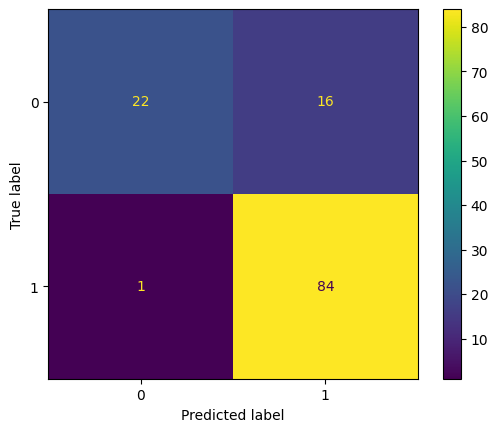

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

display.plot()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



# Hyperparameter Tuning

In [32]:
logreg = LogisticRegression(random_state=42)
scorer = make_scorer(fbeta_score, beta=2)

hyperparam_space = {
    'model__penalty': ['l1','l2','elasticnet',None],
    'model__solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'model__multi_class': ['auto','ovr','multinomial'],
}

model = Pipeline([
    ('transform', transformer),
    ('model', logreg)
])

gridsearch = GridSearchCV(
    estimator=model,          
    param_grid=hyperparam_space,    
    cv=5,                           
    scoring = scorer,
    n_jobs = -1               
)

In [33]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_iter_robust',
                                                                         Pipeline(steps=[('imp_iterative',
                                                                                          IterativeImputer()),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Loan_Amount_Term',
                                                                          'LoanAmount',
                                                                          'Dependents']),
                                                                        ('pipe_mode_onehot',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='most_frequ...
                                                                          'Property_Area']),
                                                                        ('imp_iterative',
                                                                         IterativeImputer(),
                                                                         ['Credit_History'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__multi_class': ['auto', 'ovr', 'multinomial'],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             scoring=make_scorer(fbeta_score, beta=2))

# Logistic Regression After Tuning

In [34]:
logreg_tuning = gridsearch.best_estimator_

logreg_tuning.fit(X_train, y_train)

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning)
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning)
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning)
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning)
f2_logreg_tuning = (fbeta_score(y_test, y_pred, beta=2))


score_after_tuning = pd.DataFrame({'Accuracy': accuracy_logreg_tuning, 
                                   'Precision': precision_logreg_tuning, 
                                   'Recall': recall_logreg_tuning, 
                                   'F1': f1_logreg_tuning,
                                   'F2': f2_logreg_tuning
                                   }, index=['Logistic Regression After Tune'])
score_after_tuning

,Accuracy,Precision,Recall,F1,F2
Logistic Regression After Tune,0.861789,0.84,0.988235,0.908108,0.954545


In [35]:
score_before_tuning

,Accuracy,Precision,Recall,F1 Score,F2 Score
Logistic Regression before Tuning,0.861789,0.84,0.988235,0.908108,0.954545


In [36]:
gridsearch.best_params_

{'model__multi_class': 'auto',
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

# Confusion Matrix After Tuning

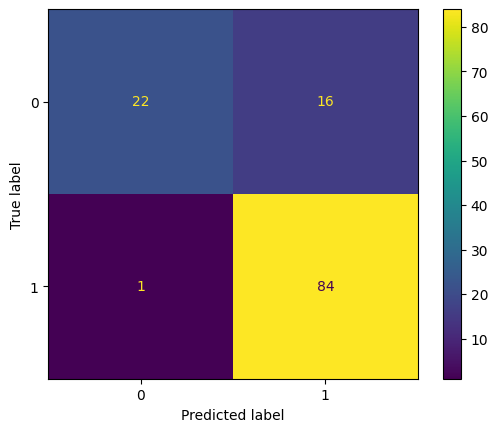

In [37]:
cm = confusion_matrix(y_test, y_pred_logreg_tuning)

display = ConfusionMatrixDisplay(confusion_matrix=cm)

display.plot()